In [1]:
import ROOT
from ROOT import TFile, TCanvas, TPad, TChain, TLegend
from ROOT import kGreen, kBlue, kRed, kBlack, kOrange, kGreen, kCyan, kMagenta, kAzure
from ROOT import TH1D, TVector3, TLorentzVector, TGraph, TMath, TFeldmanCousins
from functions.loadRDataFrame import RDF_to_pandas

import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import time

Welcome to JupyROOT 6.26/06


In [2]:
ROOT.EnableImplicitMT(40)

treename = "b"
#mydir1 = "/home/belle2/jcorrea/invisible_search/ntuples/pi_J0/signals/"
#mydir2 = "/home/belle2/jcorrea/invisible_search/ntuples/pi_J0/merged/"
mydir1 = "/hsm/belle2/bdata/users/jcorrea/invisible_search/ntuples/pi/signal/"
mydir2 = "/hsm/belle2/bdata/users/jcorrea/invisible_search/ntuples/pi/irreducible/"


# Bsig->pi+X  Btag->pi+D0 (D0->piK) 
HadronicTag_m00 = mydir1+"J0_m0.0/ntuple_HadronicTag_D_*.root"
HadronicTag_m10 = mydir1+"J0_m1.0/ntuple_HadronicTag_D_*.root"
HadronicTag_m20 = mydir1+"J0_m2.0/ntuple_HadronicTag_D_*.root"
HadronicTag_m30 = mydir1+"J0_m3.0/ntuple_HadronicTag_D_*.root"
HadronicTag_m40 = mydir1+"J0_m4.0/ntuple_HadronicTag_D_*.root"
HadronicTag_m50 = mydir1+"J0_m5.0/ntuple_HadronicTag_D_*.root"

# Bsig->pi+X  Btag->pi+D0* (D0*->D0+gamma (D0->K+pi)) 
HadronicTag_m00_Dstar_gamma = mydir1+"J0_m0.0/ntuple_HadronicTag_Dstar_gamma_*.root"
HadronicTag_m10_Dstar_gamma = mydir1+"J0_m1.0/ntuple_HadronicTag_Dstar_gamma_*.root"
HadronicTag_m20_Dstar_gamma = mydir1+"J0_m2.0/ntuple_HadronicTag_Dstar_gamma_*.root"
HadronicTag_m30_Dstar_gamma = mydir1+"J0_m3.0/ntuple_HadronicTag_Dstar_gamma_*.root"
HadronicTag_m40_Dstar_gamma = mydir1+"J0_m4.0/ntuple_HadronicTag_Dstar_gamma_*.root"
HadronicTag_m50_Dstar_gamma = mydir1+"J0_m5.0/ntuple_HadronicTag_Dstar_gamma_*.root"

# Bsig->pi+X  Btag->pi+D0* (D0*->D0+pi0 (D0->K+pi)) 
HadronicTag_m00_Dstar_pi0 = mydir1+"J0_m0.0/ntuple_HadronicTag_Dstar_pi0_*.root"
HadronicTag_m10_Dstar_pi0 = mydir1+"J0_m1.0/ntuple_HadronicTag_Dstar_pi0_*.root"
HadronicTag_m20_Dstar_pi0 = mydir1+"J0_m2.0/ntuple_HadronicTag_Dstar_pi0_*.root"
HadronicTag_m30_Dstar_pi0 = mydir1+"J0_m3.0/ntuple_HadronicTag_Dstar_pi0_*.root"
HadronicTag_m40_Dstar_pi0 = mydir1+"J0_m4.0/ntuple_HadronicTag_Dstar_pi0_*.root"
HadronicTag_m50_Dstar_pi0 = mydir1+"J0_m5.0/ntuple_HadronicTag_Dstar_pi0_*.root"



# Bsig->pi+X  Btag->l+nu+D0 (D0->pi+K)
SemilepTag_m00 = mydir1+"J0_m0.0/ntuple_SemilepTag_D_*.root"
SemilepTag_m10 = mydir1+"J0_m1.0/ntuple_SemilepTag_D_*.root"
SemilepTag_m20 = mydir1+"J0_m2.0/ntuple_SemilepTag_D_*.root"
SemilepTag_m30 = mydir1+"J0_m3.0/ntuple_SemilepTag_D_*.root"
SemilepTag_m40 = mydir1+"J0_m4.0/ntuple_SemilepTag_D_*.root"
SemilepTag_m50 = mydir1+"J0_m5.0/ntuple_SemilepTag_D_*.root"

# Bsig->pi+X  Btag->l+nu+D0* (D0*->D0(->pi+K)+gamma)
SemilepTag_m00_Dstar_gamma = mydir1+"J0_m0.0/ntuple_SemilepTag_Dstar_gamma_*.root"
SemilepTag_m10_Dstar_gamma = mydir1+"J0_m1.0/ntuple_SemilepTag_Dstar_gamma_*.root"
SemilepTag_m20_Dstar_gamma = mydir1+"J0_m2.0/ntuple_SemilepTag_Dstar_gamma_*.root"
SemilepTag_m30_Dstar_gamma = mydir1+"J0_m3.0/ntuple_SemilepTag_Dstar_gamma_*.root"
SemilepTag_m40_Dstar_gamma = mydir1+"J0_m4.0/ntuple_SemilepTag_Dstar_gamma_*.root"
SemilepTag_m50_Dstar_gamma = mydir1+"J0_m5.0/ntuple_SemilepTag_Dstar_gamma_*.root"

# Bsig->pi+X  Btag->l+nu+D0* (D0*->D0(->pi+K)+pi0)
SemilepTag_m00_Dstar_pi0 = mydir1+"J0_m0.0/ntuple_SemilepTag_Dstar_pi0_*.root"
SemilepTag_m10_Dstar_pi0 = mydir1+"J0_m1.0/ntuple_SemilepTag_Dstar_pi0_*.root"
SemilepTag_m20_Dstar_pi0 = mydir1+"J0_m2.0/ntuple_SemilepTag_Dstar_pi0_*.root"
SemilepTag_m30_Dstar_pi0 = mydir1+"J0_m3.0/ntuple_SemilepTag_Dstar_pi0_*.root"
SemilepTag_m40_Dstar_pi0 = mydir1+"J0_m4.0/ntuple_SemilepTag_Dstar_pi0_*.root"
SemilepTag_m50_Dstar_pi0 = mydir1+"J0_m5.0/ntuple_SemilepTag_Dstar_pi0_*.root"


# Bsig->bkg_charged  Btag->l+nu+D0 (D0->pi+K)
pi_charged_SemilepTag = mydir2+"pi_chargedFinal/ntuple_SemilepTag_D_Full.root"
# Bsig->bkg_charged  Btag->l+nu+D0* (D0*->D0(->pi+K)+gamma)
pi_charged_SemilepTag_Dstar_gamma = mydir2+"pi_chargedFinal/ntuple_SemilepTag_Dstar_gamma_Full.root"
# Bsig->bkg_charged  Btag->l+nu+D0* (D0*->D0(->pi+K)+pi0)
pi_charged_SemilepTag_Dstar_pi0 = mydir2+"pi_chargedFinal/ntuple_SemilepTag_Dstar_pi0_Full.root"


# Bsig->bkg_mixed   Btag->l+nu+D0+pi (D0->pi+K)
pi_mixed_SemilepTag_D0 = mydir2+"pi_mixedFinal/ntuple_SemilepTag_D0_Full.root"
# Bsig->bkg_mixed  Btag->l+nu+D0*+pi (D0*->D0(->pi+K)+gamma)
pi_mixed_SemilepTag_D0star_gamma = mydir2+"pi_mixedFinal/ntuple_SemilepTag_D0star_gamma_Full.root"
# Bsig->bkg_mixed  Btag->l+nu+D0*+pi (D0*->D0(->pi+K)+pi0)
pi_mixed_SemilepTag_D0star_pi0 = mydir2+"pi_mixedFinal/ntuple_SemilepTag_D0star_pi0_Full.root"
# Bsig->bkg_mixed  Btag->l+nu+D0*++pi (D0*+->D0(->pi+K)+pi)
pi_mixed_SemilepTag_D_0 = mydir2+"pi_mixedFinal/ntuple_SemilepTag_D_0_Full.root"
# Bsig->bkg_mixed  Btag->l+nu+D1'++pi (D1'+->D0*(->D0(K+pi)+gamma)+pi)
pi_mixed_SemilepTag_D1star_gamma = mydir2+"pi_mixedFinal/ntuple_SemilepTag_D1star_gamma_Full.root"
# Bsig->bkg_mixed  Btag->l+nu+D1'++pi (D1'+->D0*(->D0(K+pi)+pi0)+pi)
pi_mixed_SemilepTag_D1star_pi0 = mydir2+"pi_mixedFinal/ntuple_SemilepTag_D1star_pi0_Full.root"


# Bsig->bkg_charged  Btag->l+nu+D0 (D0->pi+K)
pi_charged_HadronicTag = mydir2+"pi_chargedFinal/ntuple_HadronicTag_D_Full.root"
# Bsig->bkg_charged  Btag->l+nu+D0* (D0*->D0(->pi+K)+gamma)
pi_charged_HadronicTag_Dstar_gamma = mydir2+"pi_chargedFinal/ntuple_HadronicTag_Dstar_gamma_Full.root"
# Bsig->bkg_charged  Btag->l+nu+D0* (D0*->D0(->pi+K)+pi0)
pi_charged_HadronicTag_Dstar_pi0 = mydir2+"pi_chargedFinal/ntuple_HadronicTag_Dstar_pi0_Full.root"


#topoana semilep tag
topoana_SemilepTagD = mydir2+"pi_chargedFinal/topoana.root"



# Signal Dataframe
df_HadronicTag_m00 = ROOT.RDataFrame(treename, HadronicTag_m00)
df_HadronicTag_m10 = ROOT.RDataFrame(treename, HadronicTag_m10)
df_HadronicTag_m20 = ROOT.RDataFrame(treename, HadronicTag_m20)
df_HadronicTag_m30 = ROOT.RDataFrame(treename, HadronicTag_m30)
df_HadronicTag_m40 = ROOT.RDataFrame(treename, HadronicTag_m40)
df_HadronicTag_m50 = ROOT.RDataFrame(treename, HadronicTag_m50)

df_HadronicTag_m00_Dstar_gamma = ROOT.RDataFrame(treename, HadronicTag_m00_Dstar_gamma)
df_HadronicTag_m10_Dstar_gamma = ROOT.RDataFrame(treename, HadronicTag_m10_Dstar_gamma)
df_HadronicTag_m20_Dstar_gamma = ROOT.RDataFrame(treename, HadronicTag_m20_Dstar_gamma)
df_HadronicTag_m30_Dstar_gamma = ROOT.RDataFrame(treename, HadronicTag_m30_Dstar_gamma)
df_HadronicTag_m40_Dstar_gamma = ROOT.RDataFrame(treename, HadronicTag_m40_Dstar_gamma)
df_HadronicTag_m50_Dstar_gamma = ROOT.RDataFrame(treename, HadronicTag_m50_Dstar_gamma)

df_HadronicTag_m00_Dstar_pi0 = ROOT.RDataFrame(treename, HadronicTag_m00_Dstar_pi0)
df_HadronicTag_m10_Dstar_pi0 = ROOT.RDataFrame(treename, HadronicTag_m10_Dstar_pi0)
df_HadronicTag_m20_Dstar_pi0 = ROOT.RDataFrame(treename, HadronicTag_m20_Dstar_pi0)
df_HadronicTag_m30_Dstar_pi0 = ROOT.RDataFrame(treename, HadronicTag_m30_Dstar_pi0)
df_HadronicTag_m40_Dstar_pi0 = ROOT.RDataFrame(treename, HadronicTag_m40_Dstar_pi0)
df_HadronicTag_m50_Dstar_pi0 = ROOT.RDataFrame(treename, HadronicTag_m50_Dstar_pi0)

df_SemilepTag_m00 = ROOT.RDataFrame(treename, SemilepTag_m00)
df_SemilepTag_m10 = ROOT.RDataFrame(treename, SemilepTag_m10)
df_SemilepTag_m20 = ROOT.RDataFrame(treename, SemilepTag_m20)
df_SemilepTag_m30 = ROOT.RDataFrame(treename, SemilepTag_m30)
df_SemilepTag_m40 = ROOT.RDataFrame(treename, SemilepTag_m40)
df_SemilepTag_m50 = ROOT.RDataFrame(treename, SemilepTag_m50)

df_SemilepTag_m00_Dstar_gamma = ROOT.RDataFrame(treename, SemilepTag_m00_Dstar_gamma)
df_SemilepTag_m10_Dstar_gamma = ROOT.RDataFrame(treename, SemilepTag_m10_Dstar_gamma)
df_SemilepTag_m20_Dstar_gamma = ROOT.RDataFrame(treename, SemilepTag_m20_Dstar_gamma)
df_SemilepTag_m30_Dstar_gamma = ROOT.RDataFrame(treename, SemilepTag_m30_Dstar_gamma)
df_SemilepTag_m40_Dstar_gamma = ROOT.RDataFrame(treename, SemilepTag_m40_Dstar_gamma)
df_SemilepTag_m50_Dstar_gamma = ROOT.RDataFrame(treename, SemilepTag_m50_Dstar_gamma)

df_SemilepTag_m00_Dstar_pi0 = ROOT.RDataFrame(treename, SemilepTag_m00_Dstar_pi0)
df_SemilepTag_m10_Dstar_pi0 = ROOT.RDataFrame(treename, SemilepTag_m10_Dstar_pi0)
df_SemilepTag_m20_Dstar_pi0 = ROOT.RDataFrame(treename, SemilepTag_m20_Dstar_pi0)
df_SemilepTag_m30_Dstar_pi0 = ROOT.RDataFrame(treename, SemilepTag_m30_Dstar_pi0)
df_SemilepTag_m40_Dstar_pi0 = ROOT.RDataFrame(treename, SemilepTag_m40_Dstar_pi0)
df_SemilepTag_m50_Dstar_pi0 = ROOT.RDataFrame(treename, SemilepTag_m50_Dstar_pi0)



# BKG RDataframe semilep
df_pi_charged_SemilepTag = ROOT.RDataFrame(treename, pi_charged_SemilepTag)
df_pi_charged_SemilepTag_Dstar_gamma = ROOT.RDataFrame(treename, pi_charged_SemilepTag_Dstar_gamma)
df_pi_charged_SemilepTag_Dstar_pi0 = ROOT.RDataFrame(treename, pi_charged_SemilepTag_Dstar_pi0)

df_pi_mixed_SemilepTag_D0 = ROOT.RDataFrame(treename, pi_mixed_SemilepTag_D0)
df_pi_mixed_SemilepTag_D_0 = ROOT.RDataFrame(treename, pi_mixed_SemilepTag_D_0)
df_pi_mixed_SemilepTag_D0star_gamma = ROOT.RDataFrame(treename, pi_mixed_SemilepTag_D0star_gamma)
df_pi_mixed_SemilepTag_D0star_pi0 = ROOT.RDataFrame(treename, pi_mixed_SemilepTag_D0star_pi0)
df_pi_mixed_SemilepTag_D1star_gamma = ROOT.RDataFrame(treename, pi_mixed_SemilepTag_D1star_gamma)
df_pi_mixed_SemilepTag_D1star_pi0 = ROOT.RDataFrame(treename, pi_mixed_SemilepTag_D1star_pi0)

# BKG RDataframe Hadronic
df_pi_charged_HadronicTag = ROOT.RDataFrame(treename, pi_charged_HadronicTag)
df_pi_charged_HadronicTag_Dstar_gamma = ROOT.RDataFrame(treename, pi_charged_HadronicTag_Dstar_gamma)
df_pi_charged_HadronicTag_Dstar_pi0 = ROOT.RDataFrame(treename, pi_charged_HadronicTag_Dstar_pi0)


#topoana
#df_topoana_SemilepTagD = ROOT.RDataFrame(treename, topoana_SemilepTagD)
'''
bkg_names_1 = ROOT.std.vector('string')()
for n in [pi_charged_SemilepTag, pi_mixed_SemilepTag]: bkg_names_1.push_back(n)
df_bkg_SemilepTag = ROOT.RDataFrame(treename, bkg_names_1)


bkg_names_2 = ROOT.std.vector('string')()
for n in [pi_charged_SemilepTag_Dstar_gamma, pi_mixed_SemilepTag_Dstar_gamma]: bkg_names_2.push_back(n)
df_bkg_SemilepTag_Dstar_gamma = ROOT.RDataFrame(treename, bkg_names_2)


bkg_names_3 = ROOT.std.vector('string')()
for n in [pi_charged_SemilepTag_Dstar_pi0, pi_mixed_SemilepTag_Dstar_pi0]: bkg_names_3.push_back(n)
df_bkg_SemilepTag_Dstar_pi0 = ROOT.RDataFrame(treename, bkg_names_3)'''


"\nbkg_names_1 = ROOT.std.vector('string')()\nfor n in [pi_charged_SemilepTag, pi_mixed_SemilepTag]: bkg_names_1.push_back(n)\ndf_bkg_SemilepTag = ROOT.RDataFrame(treename, bkg_names_1)\n\n\nbkg_names_2 = ROOT.std.vector('string')()\nfor n in [pi_charged_SemilepTag_Dstar_gamma, pi_mixed_SemilepTag_Dstar_gamma]: bkg_names_2.push_back(n)\ndf_bkg_SemilepTag_Dstar_gamma = ROOT.RDataFrame(treename, bkg_names_2)\n\n\nbkg_names_3 = ROOT.std.vector('string')()\nfor n in [pi_charged_SemilepTag_Dstar_pi0, pi_mixed_SemilepTag_Dstar_pi0]: bkg_names_3.push_back(n)\ndf_bkg_SemilepTag_Dstar_pi0 = ROOT.RDataFrame(treename, bkg_names_3)"

In [3]:
def ArgusPsR(p_b,p_a, Ecms):
    #accepted = True
    CMS_E = Ecms
    E_B = CMS_E/2.0
    M_B = 5.27934

    pa = TLorentzVector()
    pb = TLorentzVector()
    pa_boost = TLorentzVector()
    boostPS = TVector3()

    pa = p_a
    pb = p_b

    P_B = np.sqrt(E_B*E_B - M_B*M_B)
    betav = P_B/E_B

    # Boosting of pion in the signal side to the B restframe with following approximation
    # a) the momentum direction of the B in the 1-prong side as the opposite direction of the momentum of the D0+l in the three-prong side
    # b) the B energy by ECMS/2
    boostPS = betav*(pb.BoostVector().Unit())
    pa.Boost(boostPS)

    Ea_boost = pa.E()

    Xval = (2.0*Ea_boost)/M_B

    return Xval

In [4]:
def P_smearing(P, perc):
    # Let's create the detector effect (smearing 5% around in momenta)
    pX_CMS = P.Px()
    pY_CMS = P.Py()
    pZ_CMS = P.Pz()
    p_ECMS = P.Energy()

    pt_cms = (pX_CMS**2 + pY_CMS**2 + pZ_CMS**2)**0.5 # Calculate transverse momentum
    sigma_pt = perc * pt_cms  # Standard deviation of 1% of transverse momentum

            # Applying smearing using a Gaussian distribution with mean = 1 and standard deviation = sigma_pt
    pX_CMS_smeared = pX_CMS * (1.0 + random.gauss(0,sigma_pt))
    pY_CMS_smeared = pY_CMS * (1.0 + random.gauss(0,sigma_pt))
    pZ_CMS_smeared = pZ_CMS * (1.0 + random.gauss(0,sigma_pt))

    return pX_CMS_smeared, pY_CMS_smeared, pZ_CMS_smeared, p_ECMS

In [5]:
def add_q2(Ecms, px, py, pz):
    """
    Analisis based on B+ -> K+ nunu
    Formula found in next link, page: 28:
    https://docs.belle2.org/record/3785/files/BELLE2-TALK-DRAFT-2023-117.pdf
    """

    # Mass of the pi
    m_sig = 0.13957039
    s = Ecms**2

    pt_cms = (px**2 + py**2 + pz**2)**0.5
    Esig_CMS = (m_sig**2 + pt_cms**2)**0.5

    q2 = s/4 + m_sig**2 - np.sqrt(s)*Esig_CMS

    return q2

In [12]:
def RDtoPandas(df, flag, cut=None, columns=None, topoana=None):
    
    if cut: df = df.Filter(cut)
    else: df = df
    
    if topoana: df = df.Filter(topoana)
    else: df = df

    if columns: npdf = df.AsNumpy(columns=columns)
    else: npdf = df.AsNumpy()

    

    data = pd.DataFrame(npdf)
    
    
    #Mmin2_list = []
    #Mmax2_list = []
    Xval_list = []
    q2_list = []
    # Change the name of columns with the porpuse of unified or momenta names
    if "Dstar_tag_CMS_mcE" and "Dstar_tag_CMS_mcPX" and "Dstar_tag_CMS_mcPY" and "Dstar_tag_CMS_mcPZ" in data.columns:
        #data=data.rename(columns = {'Dstar_tag_CMS_mcE':'track1_tag_CMS_mcE', 'Dstar_tag_CMS_mcPX': 'track1_tag_CMS_mcPX', 
         #                           'Dstar_tag_CMS_mcPY': 'track1_tag_CMS_mcPY', 'Dstar_tag_CMS_mcPZ':'track1_tag_CMS_mcPZ' })
        
        for row in range(len(data.index)):

            pa = TLorentzVector()
            ptrack1_tag = TLorentzVector()
            ptrack2_tag = TLorentzVector()
            #ptrack3_tag = TLorentzVector()
            
            #pb = TLorentzVector()

            pa.SetPxPyPzE(float(data.at[row, "track_sig_CMS_mcPX"]),
                        float(data.at[row, "track_sig_CMS_mcPY"]),
                        float(data.at[row, "track_sig_CMS_mcPZ"]),
                        float(data.at[row, "track_sig_CMS_mcE"]))
            
            ptrack1_tag.SetPxPyPzE(float(data.at[row, "Dstar_tag_CMS_mcPX"]),
                                float(data.at[row, "Dstar_tag_CMS_mcPY"]),
                                float(data.at[row, "Dstar_tag_CMS_mcPZ"]),
                                float(data.at[row, "Dstar_tag_CMS_mcE"]))
            
            ptrack2_tag.SetPxPyPzE(float(data.at[row, "track_tag_CMS_mcPX"]),
                                float(data.at[row, "track_tag_CMS_mcPY"]),
                                float(data.at[row, "track_tag_CMS_mcPZ"]),
                                float(data.at[row, "track_tag_CMS_mcE"]))
            
            '''D_CMS_PX = float(data.at[row, "D_tag_CMS_mcPX"])
            D_CMS_PY = float(data.at[row, "D_tag_CMS_mcPY"])
            D_CMS_PZ = float(data.at[row, "D_tag_CMS_mcPZ"])
            D_CMS_E = float(data.at[row, "D_tag_CMS_mcE"])
                            
            lep_CMS_PX = float(data.at[row, "track_tag_CMS_mcPX"]) 
            lep_CMS_PY = float(data.at[row, "track_tag_CMS_mcPY"])
            lep_CMS_PZ = float(data.at[row, "track_tag_CMS_mcPZ"])
            lep_CMS_E = float(data.at[row, "track_tag_CMS_mcE"])
                            
            PbX = D_CMS_PX + lep_CMS_PX
            PbY = D_CMS_PY + lep_CMS_PY
            PbZ = D_CMS_PZ + lep_CMS_PZ
            PbE = D_CMS_E + lep_CMS_E
                            
            pb.SetPxPyPzE(PbX, PbY, PbZ, PbE)'''                 
                            
            
            #pb = ptrack1_tag  + ptrack2_tag #+ ptrack3_tag
            
            # Let's smearing the momenta of the tracks wirh a 1% of smearing
            PaX_CMS_smeared, PaY_CMS_smeared, PaZ_CMS_smeared, Pa_ECMS = P_smearing(pa, perc=0.01)
            Ptrack1X_CMS_smeared, Ptrack1Y_CMS_smeared, Ptrack1Z_CMS_smeared, Ptrack1_ECMS = P_smearing(ptrack1_tag , perc=0.01)
            Ptrack2X_CMS_smeared, Ptrack2Y_CMS_smeared, Ptrack2Z_CMS_smeared, Ptrack2_ECMS = P_smearing(ptrack2_tag , perc=0.01)

            P_a = TLorentzVector()
            P_b = TLorentzVector()
            P_track1 = TLorentzVector()
            P_track2 = TLorentzVector()
            
            P_a.SetPxPyPzE(PaX_CMS_smeared, PaY_CMS_smeared, PaZ_CMS_smeared, Pa_ECMS)
            P_track1.SetPxPyPzE(Ptrack1X_CMS_smeared, Ptrack1Y_CMS_smeared, Ptrack1Z_CMS_smeared, Ptrack1_ECMS)
            P_track2.SetPxPyPzE(Ptrack2X_CMS_smeared, Ptrack2Y_CMS_smeared, Ptrack2Z_CMS_smeared, Ptrack2_ECMS)

           

            P_b = P_track1 + P_track2
        
            '''pb.SetPxPyPzE(float(data.at[row, "track_tag_px_CMS"]),
                        float(data.at[row, "track_tag_py_CMS"]),
                        float(data.at[row, "track_tag_pz_CMS"]),
                        float(data.at[row, "track_tag_E_CMS"]))'''

            #Ecms = 10.58 
            Ecms = float(data.at[row, "Ecms"])

            q2Val = add_q2(Ecms, PaX_CMS_smeared, PaY_CMS_smeared, PaZ_CMS_smeared)
            
            if flag==1:
                Xval = ArgusPsR(P_b,P_a,Ecms)

                Xval_list.append(float(Xval))
                q2_list.append(float(q2Val))
            else:
                #flagFOMS, Mmin2, Mmax2 = calculateMminMmax(P_a,P_b,Ecms)
                Xval = ArgusPsR(P_b,P_a,Ecms)

                #Mmin2_list.append(float(Mmin2))
                #Mmax2_list.append(float(Mmax2))
                Xval_list.append(float(Xval))
                q2_list.append(float(q2Val))
            

            
    else:
        for row in range(len(data.index)):

            pa = TLorentzVector()
            ptrack1_tag = TLorentzVector()
            ptrack2_tag = TLorentzVector()
            #ptrack3_tag = TLorentzVector()
            
            pb = TLorentzVector()

            pa.SetPxPyPzE(float(data.at[row, "track_sig_CMS_mcPX"]),
                        float(data.at[row, "track_sig_CMS_mcPY"]),
                        float(data.at[row, "track_sig_CMS_mcPZ"]),
                        float(data.at[row, "track_sig_CMS_mcE"]))
            
            ptrack1_tag.SetPxPyPzE(float(data.at[row, "D_tag_CMS_mcPX"]),
                                float(data.at[row, "D_tag_CMS_mcPY"]),
                                float(data.at[row, "D_tag_CMS_mcPZ"]),
                                float(data.at[row, "D_tag_CMS_mcE"]))
            
            ptrack2_tag.SetPxPyPzE(float(data.at[row, "track_tag_CMS_mcPX"]),
                                float(data.at[row, "track_tag_CMS_mcPY"]),
                                float(data.at[row, "track_tag_CMS_mcPZ"]),
                                float(data.at[row, "track_tag_CMS_mcE"]))
            
            '''D_CMS_PX = float(data.at[row, "D_tag_CMS_mcPX"])
            D_CMS_PY = float(data.at[row, "D_tag_CMS_mcPY"])
            D_CMS_PZ = float(data.at[row, "D_tag_CMS_mcPZ"])
            D_CMS_E = float(data.at[row, "D_tag_CMS_mcE"])
                            
            lep_CMS_PX = float(data.at[row, "track_tag_CMS_mcPX"]) 
            lep_CMS_PY = float(data.at[row, "track_tag_CMS_mcPY"])
            lep_CMS_PZ = float(data.at[row, "track_tag_CMS_mcPZ"])
            lep_CMS_E = float(data.at[row, "track_tag_CMS_mcE"])
                            
            PbX = D_CMS_PX + lep_CMS_PX
            PbY = D_CMS_PY + lep_CMS_PY
            PbZ = D_CMS_PZ + lep_CMS_PZ
            PbE = D_CMS_E + lep_CMS_E
                            
            pb.SetPxPyPzE(PbX, PbY, PbZ, PbE)'''                 
                            
            
            #pb = ptrack1_tag  + ptrack2_tag #+ ptrack3_tag
            
        
            '''pb.SetPxPyPzE(float(data.at[row, "track_tag_px_CMS"]),
                        float(data.at[row, "track_tag_py_CMS"]),
                        float(data.at[row, "track_tag_pz_CMS"]),
                        float(data.at[row, "track_tag_E_CMS"]))'''

            # Let's smearing the momenta of the tracks wirh a 1% of smearing
            PaX_CMS_smeared, PaY_CMS_smeared, PaZ_CMS_smeared, Pa_ECMS = P_smearing(pa, perc=0.01)
            Ptrack1X_CMS_smeared, Ptrack1Y_CMS_smeared, Ptrack1Z_CMS_smeared, Ptrack1_ECMS = P_smearing(ptrack1_tag , perc=0.01)
            Ptrack2X_CMS_smeared, Ptrack2Y_CMS_smeared, Ptrack2Z_CMS_smeared, Ptrack2_ECMS = P_smearing(ptrack2_tag , perc=0.01)

            P_a = TLorentzVector()
            P_b = TLorentzVector()
            P_track1 = TLorentzVector()
            P_track2 = TLorentzVector()
            
            P_a.SetPxPyPzE(PaX_CMS_smeared, PaY_CMS_smeared, PaZ_CMS_smeared, Pa_ECMS)
            P_track1.SetPxPyPzE(Ptrack1X_CMS_smeared, Ptrack1Y_CMS_smeared, Ptrack1Z_CMS_smeared, Ptrack1_ECMS)
            P_track2.SetPxPyPzE(Ptrack2X_CMS_smeared, Ptrack2Y_CMS_smeared, Ptrack2Z_CMS_smeared, Ptrack2_ECMS)

            

            P_b = P_track1 + P_track2
            
            #Ecms = 10.58 
            Ecms = float(data.at[row, "Ecms"])

            q2Val = add_q2(Ecms, PaX_CMS_smeared, PaY_CMS_smeared, PaZ_CMS_smeared)
            
            if flag==1:
                Xval = ArgusPsR(P_b,P_a,Ecms)

                Xval_list.append(float(Xval))
                q2_list.append(float(q2Val))
            else:
                #flagFOMS, Mmin2, Mmax2 = calculateMminMmax(P_a,P_b,Ecms)
                Xval = ArgusPsR(P_b,P_a,Ecms)

                #Mmin2_list.append(float(Mmin2))
                #Mmax2_list.append(float(Mmax2))
                Xval_list.append(float(Xval))
                q2_list.append(float(q2Val))
    


    # Using 'Mmin2' and 'Mmax2' as the column name and equating it to the list

    if flag==1:
        data['Xps'] = Xval_list
        data['q2'] = q2_list
    else:
        #data['Mmin2'] = Mmin2_list
        #data['Mmax2'] = Mmax2_list
        data['Xps'] = Xval_list
        data['q2'] = q2_list
    
    
    return data

In [13]:
def ReScale(df, fraction=None):
    #df_new = df.query(cut).reset_index()
    if fraction: 
        if (fraction >1):
            pdf = df.sample(frac=fraction, replace=True, random_state=1)
        else:
            pdf = df.sample(frac=fraction, random_state=1)
    else: pdf = df
    return pdf

In [14]:
baseCut = f'nEta == 0 && nEtaPrime == 0 && (nTracks_ == 4 || nTracks_ == 6)' # The cut nPi0 is done in the reconstruction process
baseCut+= ' && track_sig_genMotherPDG != 130 && track_tag_genMotherPDG != 130 && pi_tag_genMotherPDG != 130'

# Individual cuts
D_Mass_Cut = 'D_tag_M > 1.83 && D_tag_M < 1.89'   # D0mass = 1.864
B_Mass_htag_Cut = 'B_tag_M > 5.27 && B_tag_M < 5.29'   # B+mass = 5.280
B_Mass_stag_Cut = 'B_tag_M < 5.29'
Dstar_Mass_Cut  = 'Dstar_tag_M > 1.98 && Dstar_tag_M < 2.03'  # D*0mass = 2.007
B_tag_CMS_mcP_Cut = 'B_tag_CMS_mcP > 0.2 && B_tag_CMS_mcP < 0.45'
B_tag_lab_mcP_Cut = 'B_tag_mcP > 1.0'
track_sig_dr_Cut  = 'track_sig_dr < 0.5' 
track_tag_dr_Cut  = 'track_tag_dr < 0.5' 
photonsEnergyCMS_Cut = 'genTotalPhotonsEnergyOfEvent < 1.5'
B_tag_cosAngleCMSDaughters_Cut = 'B_tag_cosAngleCMS_daughters < -0.95'

invM_track_sig_D_tag_Cut = '(invM_track_sig_D_tag < 2.00 || invM_track_sig_D_tag > 2.02) && '
invM_track_sig_D_tag_Cut+= '(invM_track_sig_D_tag < 2.40 || invM_track_sig_D_tag > 2.50)'

# General cuts by Tag
# Hadronic tag
optCut_htag = f'{baseCut} && {D_Mass_Cut} && {B_Mass_htag_Cut} && {B_tag_CMS_mcP_Cut} && {track_sig_dr_Cut} && {photonsEnergyCMS_Cut} && {B_tag_cosAngleCMSDaughters_Cut}'
# Semilep tag
optCut_stag = f'{baseCut} && {D_Mass_Cut} && {B_Mass_stag_Cut} && {B_tag_CMS_mcP_Cut} && {track_sig_dr_Cut} && {track_tag_dr_Cut} && {photonsEnergyCMS_Cut} && {B_tag_lab_mcP_Cut}'
optCut_stag+= f' && {invM_track_sig_D_tag_Cut}'

optCut_htag_Dstar = f'{optCut_htag} && {Dstar_Mass_Cut}'
optCut_stag_Dstar = f'{optCut_stag} && {Dstar_Mass_Cut} && (invM_track_sig_Dstar_tag < 2.39 || invM_track_sig_Dstar_tag > 2.51)'

# perfect PID
partial_matchCut = 'abs(track_sig_mcPDG) == 211 && abs(pi_tag_mcPDG) == 211 && abs(K_tag_mcPDG) == 321'
partial_matchCut_htag = f'{partial_matchCut} && abs(track_tag_mcPDG) == 211'
partial_matchCut_stag = f'{partial_matchCut} && (abs(track_tag_mcPDG)== 11 || abs(track_tag_mcPDG)==13)'

# Matching Cuts
matchCut_htag = f'{partial_matchCut_htag} && abs(track_sig_genMotherPDG) == 521'
matchCut_stag = f'{partial_matchCut_stag} && abs(track_sig_genMotherPDG) == 521'

signal_htag = f'{matchCut_htag} && {optCut_htag}'
signal_htag_Dstar = f'{matchCut_htag} && {optCut_htag_Dstar}'
signal_stag = f'{matchCut_stag} && {optCut_stag}'
signal_stag_Dstar = f'{matchCut_stag} && {optCut_stag_Dstar}'

bkg_htag = f'{partial_matchCut_htag} && {optCut_htag}'
bkg_htag_Dstar = f'{partial_matchCut_htag} && {optCut_htag_Dstar}'
bkg_stag = f'{partial_matchCut_stag} && {optCut_stag}'
bkg_stag_Dstar = f'{partial_matchCut_stag} && {optCut_stag_Dstar}'

In [15]:
cols=["nEta", "nEtaPrime","nTracks_", "nTracks_", "track_sig_genMotherPDG", "track_tag_genMotherPDG", "pi_tag_genMotherPDG",
      "D_tag_M","B_tag_M", "B_tag_CMS_mcP", "B_tag_mcP", "track_sig_dr", "track_tag_dr", "genTotalPhotonsEnergyOfEvent", "B_tag_cosAngleCMS_daughters",
      "track_sig_mcPDG", "K_tag_mcPDG", "track_tag_mcPDG", "track_sig_CMS_mcE","track_sig_CMS_mcPX", "track_sig_CMS_mcPY", "track_sig_CMS_mcPZ", "D_tag_CMS_mcE","D_tag_CMS_mcPX",
      "D_tag_CMS_mcPY", "D_tag_CMS_mcPZ", "track_tag_CMS_mcE", "track_tag_CMS_mcPX", "track_tag_CMS_mcPY", "track_tag_CMS_mcPZ", "pi_tag_mcPDG", "Ecms",
      "invM_track_sig_D_tag"]

cols_bkg=["nEta", "nEtaPrime","nTracks_", "nTracks_", "track_sig_genMotherPDG", "track_tag_genMotherPDG", "pi_tag_genMotherPDG",
      "D_tag_M","B_tag_M", "B_tag_CMS_mcP", "B_tag_mcP", "track_sig_dr", "track_tag_dr", "genTotalPhotonsEnergyOfEvent", "B_tag_cosAngleCMS_daughters",
      "track_sig_mcPDG", "K_tag_mcPDG", "track_tag_mcPDG", "track_sig_CMS_mcE","track_sig_CMS_mcPX", "track_sig_CMS_mcPY", "track_sig_CMS_mcPZ", "D_tag_CMS_mcE","D_tag_CMS_mcPX",
      "D_tag_CMS_mcPY", "D_tag_CMS_mcPZ", "track_tag_CMS_mcE", "track_tag_CMS_mcPX", "track_tag_CMS_mcPY", "track_tag_CMS_mcPZ", "pi_tag_mcPDG", "Ecms",
      "invM_track_sig_D_tag", "iDcyBrP_50_0","iDcyBrCcP_50_0"]

cols_Dstar=["nEta", "nEtaPrime","nTracks_", "nTracks_", "track_sig_genMotherPDG", "track_tag_genMotherPDG", "pi_tag_genMotherPDG",
      "D_tag_M","B_tag_M", "B_tag_CMS_mcP", "B_tag_mcP", "track_sig_dr", "track_tag_dr", "genTotalPhotonsEnergyOfEvent", "B_tag_cosAngleCMS_daughters",
      "track_sig_mcPDG", "K_tag_mcPDG", "track_tag_mcPDG", "track_sig_CMS_mcPX", "track_sig_CMS_mcPY", "track_sig_CMS_mcPZ", "Dstar_tag_CMS_mcE","Dstar_tag_CMS_mcPX",
      "Dstar_tag_CMS_mcPY", "Dstar_tag_CMS_mcPZ", "track_tag_CMS_mcE", "track_tag_CMS_mcPX", "track_tag_CMS_mcPY", "track_tag_CMS_mcPZ", "Dstar_tag_M", "invM_track_sig_Dstar_tag",
      "Ecms", "pi_tag_mcPDG", "track_sig_CMS_mcE", "invM_track_sig_D_tag"]

cols_Dstar_bkg=["nEta", "nEtaPrime","nTracks_", "nTracks_", "track_sig_genMotherPDG", "track_tag_genMotherPDG", "pi_tag_genMotherPDG",
      "D_tag_M","B_tag_M", "B_tag_CMS_mcP", "B_tag_mcP", "track_sig_dr", "track_tag_dr", "genTotalPhotonsEnergyOfEvent", "B_tag_cosAngleCMS_daughters",
      "track_sig_mcPDG", "K_tag_mcPDG", "track_tag_mcPDG", "track_sig_CMS_mcPX", "track_sig_CMS_mcPY", "track_sig_CMS_mcPZ", "Dstar_tag_CMS_mcE","Dstar_tag_CMS_mcPX",
      "Dstar_tag_CMS_mcPY", "Dstar_tag_CMS_mcPZ", "track_tag_CMS_mcE", "track_tag_CMS_mcPX", "track_tag_CMS_mcPY", "track_tag_CMS_mcPZ", "Dstar_tag_M", "invM_track_sig_Dstar_tag",
      "Ecms", "pi_tag_mcPDG", "track_sig_CMS_mcE", "invM_track_sig_D_tag", "iDcyBrP_50_0", "iDcyBrCcP_50_0"]




In [16]:

# Reducible Bkg without nn and KoL
# SemilepTag D
irr_charged_Semileptag_D = '((iDcyBrP_50_0 == 27 || iDcyBrCcP_50_0 == 27) || (iDcyBrP_50_0 == 9 || iDcyBrCcP_50_0 == 9) || (iDcyBrP_50_0 == 20 || iDcyBrCcP_50_0 == 20))'

neg_irr_charged_Semileptag_D = f' ! {irr_charged_Semileptag_D}'

# SemilepTag Dstar Gamma
irr_charged_Semileptag_Dstar_gamma = ' ((iDcyBrP_50_0 == 24 || iDcyBrCcP_50_0 == 24) || (iDcyBrP_50_0 == 19 || iDcyBrCcP_50_0 == 19) || (iDcyBrP_50_0 == 29 || iDcyBrCcP_50_0 == 29))'

neg_irr_charged_Semileptag_Dstar_gamma = f' ! {irr_charged_Semileptag_Dstar_gamma}'

# SemilepTag Dstar pi0
irr_charged_Semileptag_Dstar_pi0 = ' ((iDcyBrP_50_0 == 15 || iDcyBrCcP_50_0 == 15) || (iDcyBrP_50_0 == 17 || iDcyBrCcP_50_0 == 17) || (iDcyBrP_50_0 == 12 || iDcyBrCcP_50_0 == 12))'

neg_irr_charged_Semileptag_Dstar_pi0 = f' ! {irr_charged_Semileptag_Dstar_pi0}'


# HadTag D
irr_charged_Hadtag_D = ' ((iDcyBrP_50_0 == 15 || iDcyBrCcP_50_0 == 15)  || (iDcyBrP_50_0 == 32 || iDcyBrCcP_50_0 == 32) || (iDcyBrP_50_0 == 13 || iDcyBrCcP_50_0 == 13))'

neg_irr_charged_Hadtag_D = f' ! {irr_charged_Hadtag_D}'

# HadTag Dstar Gamma
irr_charged_Hadtag_Dstar_gamma = ' ((iDcyBrP_50_0 == 29 || iDcyBrCcP_50_0 == 29) || (iDcyBrP_50_0 == 23 || iDcyBrCcP_50_0 == 23) || (iDcyBrP_50_0 == 24 || iDcyBrCcP_50_0 == 24))'

neg_irr_charged_Hadtag_Dstar_gamma = f' ! {irr_charged_Hadtag_Dstar_gamma}'

# HadTag Dstar pi0
irr_charged_Hadtag_Dstar_pi0 = ' ((iDcyBrP_50_0 == 18 || iDcyBrCcP_50_0 == 18) || (iDcyBrP_50_0 == 31 || iDcyBrCcP_50_0 == 31) || (iDcyBrP_50_0 == 24 || iDcyBrCcP_50_0 == 24))'

neg_irr_charged_Hadtag_Dstar_pi0 = f' ! {irr_charged_Hadtag_Dstar_pi0}'

In [17]:
# "irr" significa que no podemos reducir con cortes de detector como ECL y KLM
pi_charged_SemilepTag_irr_wc_df = RDtoPandas(df_pi_charged_SemilepTag, flag= 2, cut=bkg_stag, columns=cols_bkg, topoana=irr_charged_Semileptag_D)
pi_charged_SemilepTag_Dstar_gamma_irr_wc_df = RDtoPandas(df_pi_charged_SemilepTag_Dstar_gamma, flag= 2, cut=bkg_stag_Dstar, columns=cols_Dstar_bkg, topoana=irr_charged_Semileptag_Dstar_gamma)
pi_charged_SemilepTag_Dstar_pi0_irr_wc_df = RDtoPandas(df_pi_charged_SemilepTag_Dstar_pi0, flag= 2, cut=bkg_stag_Dstar, columns=cols_Dstar_bkg, topoana=irr_charged_Semileptag_Dstar_pi0)


# "red" significa ruidos que vamos a reducir al 40%
pi_charged_SemilepTag_red_wc_df = RDtoPandas(df_pi_charged_SemilepTag, flag= 2, cut=bkg_stag, columns=cols_bkg, topoana=neg_irr_charged_Semileptag_D)
pi_charged_SemilepTag_Dstar_gamma_red_wc_df = RDtoPandas(df_pi_charged_SemilepTag_Dstar_gamma, flag= 2, cut=bkg_stag_Dstar, columns=cols_Dstar_bkg, topoana=neg_irr_charged_Semileptag_Dstar_gamma)
pi_charged_SemilepTag_Dstar_pi0_red_wc_df = RDtoPandas(df_pi_charged_SemilepTag_Dstar_pi0, flag= 2, cut=bkg_stag_Dstar, columns=cols_Dstar_bkg, topoana=neg_irr_charged_Semileptag_Dstar_pi0)

In [18]:
print(len(pi_charged_SemilepTag_irr_wc_df))
print(len(pi_charged_SemilepTag_Dstar_gamma_irr_wc_df))
print(len(pi_charged_SemilepTag_Dstar_pi0_irr_wc_df))

591
210
346


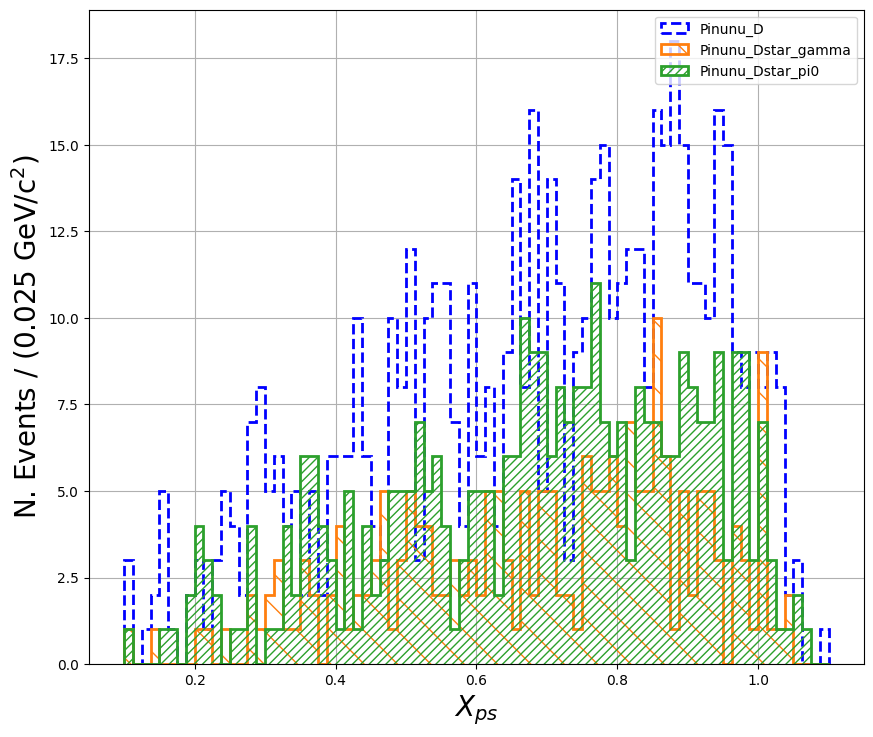

In [19]:
plt.figure(figsize=(10, 8.5))
# Datos con pandas
Pinunu_D = pi_charged_SemilepTag_irr_wc_df["Xps"]
Pinunu_Dstar_gamma = pi_charged_SemilepTag_Dstar_gamma_irr_wc_df["Xps"]
Pinunu_Dstar_pi0 = pi_charged_SemilepTag_Dstar_pi0_irr_wc_df["Xps"]

plt.hist(Pinunu_D, 80 , label = "Pinunu_D", range = (0.1, 1.1), linestyle = 'dashed', histtype = 'step', linewidth = 2, facecolor = '#2CBDFE', lw = 2, edgecolor = 'b')
plt.hist(Pinunu_Dstar_gamma, 80,  label = 'Pinunu_Dstar_gamma', range = (0.1, 1.1), histtype = 'step', hatch = '\\', facecolor = 'k', linewidth = 2)
plt.hist(Pinunu_Dstar_pi0, 80, label = 'Pinunu_Dstar_pi0', range = (0.1, 1.1), histtype = 'step', linewidth = 2, hatch= '////', lw = 2)
#plt.hist(cheeInvMass, 80, weights = hchee_w*260000, label = r'e$\bar{e}$ background', range = (0., 2.0), histtype = 'step', linewidth = 2, lw = 2, linestyle = 'dashed')


plt.xlabel("$X_{ps}$",fontsize = 20)
plt.ylabel(r"N. Events / (0.025 GeV/$\mathrm{c}^2$)",fontsize = 20)
#plt.title(r"$M_{min}^2$ and $M_{max}^2$ distribution - $M_{\chi}=0.0$")
plt.legend(loc='upper right')
plt.grid()
#plt.savefig('SignalofMass.png')
plt.show()

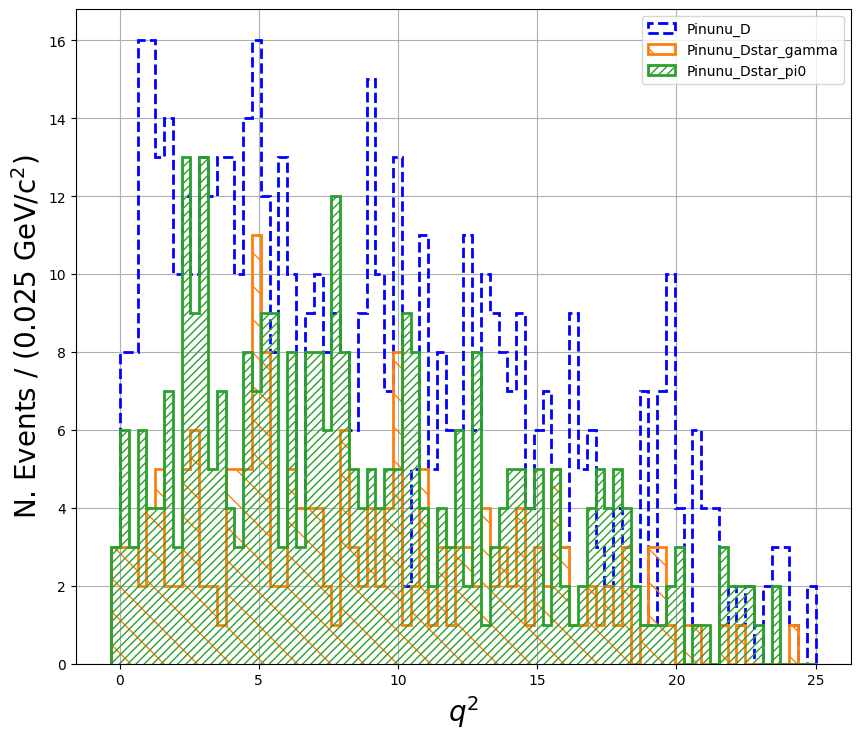

In [20]:
plt.figure(figsize=(10, 8.5))
# Datos con pandas
Pinunu_D = pi_charged_SemilepTag_irr_wc_df["q2"]
Pinunu_Dstar_gamma = pi_charged_SemilepTag_Dstar_gamma_irr_wc_df["q2"]
Pinunu_Dstar_pi0 = pi_charged_SemilepTag_Dstar_pi0_irr_wc_df["q2"]

plt.hist(Pinunu_D, 80 , label = "Pinunu_D", range = (-0.3, 25), linestyle = 'dashed', histtype = 'step', linewidth = 2, facecolor = '#2CBDFE', lw = 2, edgecolor = 'b')
plt.hist(Pinunu_Dstar_gamma, 80,  label = 'Pinunu_Dstar_gamma', range = (-0.3, 25), histtype = 'step', hatch = '\\', facecolor = 'k', linewidth = 2)
plt.hist(Pinunu_Dstar_pi0, 80, label = 'Pinunu_Dstar_pi0', range = (-0.3, 25), histtype = 'step', linewidth = 2, hatch= '////', lw = 2)
#plt.hist(cheeInvMass, 80, weights = hchee_w*260000, label = r'e$\bar{e}$ background', range = (0., 2.0), histtype = 'step', linewidth = 2, lw = 2, linestyle = 'dashed')


plt.xlabel("$q^2$",fontsize = 20)
plt.ylabel(r"N. Events / (0.025 GeV/$\mathrm{c}^2$)",fontsize = 20)
#plt.title(r"$M_{min}^2$ and $M_{max}^2$ distribution - $M_{\chi}=0.0$")
plt.legend(loc='upper right')
plt.grid()
#plt.savefig('SignalofMass.png')
plt.show()

In [21]:
Pinunu_Semi_df = pd.concat([pi_charged_SemilepTag_irr_wc_df, pi_charged_SemilepTag_Dstar_gamma_irr_wc_df, pi_charged_SemilepTag_Dstar_pi0_irr_wc_df])

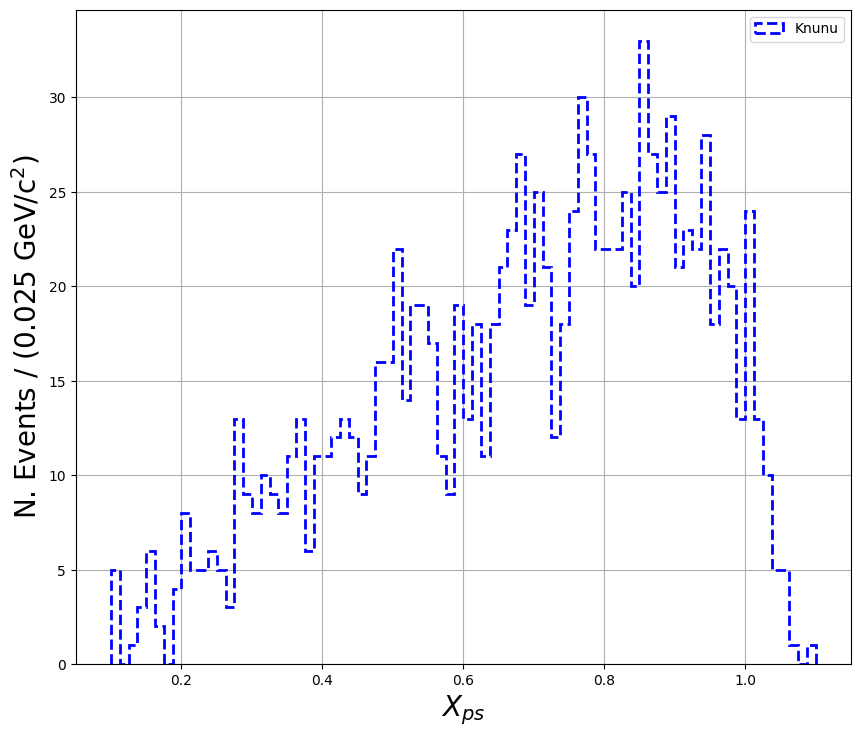

In [22]:
plt.figure(figsize=(10, 8.5))
# Datos con pandas
Pinunu = Pinunu_Semi_df["Xps"]


plt.hist(Pinunu, 80 , label = "Knunu", range = (0.1, 1.1), linestyle = 'dashed', histtype = 'step', linewidth = 2, facecolor = '#2CBDFE', lw = 2, edgecolor = 'b')
#plt.hist(Knunu_Dstar_gamma, 80,  label = 'Knunu_Dstar_gamma', range = (0.1, 1.1), histtype = 'step', hatch = '\\', facecolor = 'k', linewidth = 2)
#plt.hist(Knunu_Dstar_pi0, 80, label = 'Knunu_Dstar_pi0', range = (0.1, 1.1), histtype = 'step', linewidth = 2, hatch= '////', lw = 2)
#plt.hist(cheeInvMass, 80, weights = hchee_w*260000, label = r'e$\bar{e}$ background', range = (0., 2.0), histtype = 'step', linewidth = 2, lw = 2, linestyle = 'dashed')


plt.xlabel("$X_{ps}$",fontsize = 20)
plt.ylabel(r"N. Events / (0.025 GeV/$\mathrm{c}^2$)",fontsize = 20)
#plt.title(r"$M_{min}^2$ and $M_{max}^2$ distribution - $M_{\chi}=0.0$")
plt.legend(loc='upper right')
plt.grid()
#plt.savefig('SignalofMass.png')
plt.show()